<a href="https://colab.research.google.com/github/lukkychan/resolution_changer/blob/main/today1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf frames
!rm -rf frames/720p
!rm -rf frames/360p
!rm -rf scaled
!rm -rf predicted
!rm -rf Pre_orginal
!rm -rf dataset
!rm -rf dataset/720p
!rm -rf dataset/360s
!rm -rf checkpoints
!rm -rf temp_model
!rm -rf temp_scaled

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!mkdir -p frames/720p
!mkdir -p frames/360p
!mkdir scaled
!mkdir predicted
!mkdir dataset
!mkdir -p dataset/720p
!mkdir -p dataset/360s
!mkdir checkpoints

In [2]:
import cv2

# Specify the path to the video file
video_path = "/content/drive/MyDrive/model/360p.mp4"

# Specify the output folder to save the frames
output_folder = "/content/frames/360p/"

# Open the video file
video = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print(total_frames)

# Calculate the frame interval to evenly sample the frames
frame_interval = max(total_frames // 150, 1)

# Initialize a counter to keep track of the extracted frames
frame_count = 0

# Loop through the frames and extract the desired number of frames
while frame_count <= 150:
    # Read the current frame
    ret, frame = video.read()

    # Check if the frame was successfully read
    if not ret:
        break

    # Save the frame as an image file
    frame_path = f"{output_folder}{frame_count:03d}.jpg"
    cv2.imwrite(frame_path, frame)

    # Increment the frame count
    frame_count += 1

    # Move to the next frame based on the frame interval
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_count * frame_interval)

# Release the video capture object
video.release()
print("done.")


2987
done.


In [ ]:
import cv2

# Specify the path to the video file
video_path = "/content/drive/MyDrive/model/720p.mp4"

# Specify the output folder to save the frames
output_folder = "/content/frames/720p/"

# Open the video file
video = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print(total_frames)

# Calculate the frame interval to evenly sample the frames
frame_interval = max(total_frames // 150, 1)

# Initialize a counter to keep track of the extracted frames
frame_count = 0

# Loop through the frames and extract the desired number of frames
while frame_count <= 150:
    # Read the current frame
    ret, frame = video.read()

    # Check if the frame was successfully read
    if not ret:
        break

    # Save the frame as an image file
    frame_path = f"{output_folder}{frame_count:03d}.jpg"
    cv2.imwrite(frame_path, frame)

    # Increment the frame count
    frame_count += 1

    # Move to the next frame based on the frame interval
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_count * frame_interval)

# Release the video capture object
video.release()
print("done.")


2986
done.


In [ ]:
import os
import subprocess

def scale_images(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a list of all image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    for image_file in image_files:
        # Construct the input and output file paths
        input_path = os.path.join(input_folder, image_file)
        output_path = os.path.join(output_folder, image_file)

        # Execute FFmpeg command to scale the image to 1920x1080
        command = ['ffmpeg', '-i', input_path, '-vf', 'scale=1280:720', output_path]
        subprocess.call(command)

# Specify the paths to the input folder and output folder
input_folder = '/content/frames/360p/'
output_folder = '/content/scaled/'

# Call the function to scale the images
scale_images(input_folder, output_folder)
print("scaling done.")

scaling done.


In [ ]:
import cv2

# Specify the directory containing the original 1080p images
original_dir = '/content/frames/720p/'

# Create a directory to save the cropped images
#os.makedirs('path/to/save/cropped/images', exist_ok=True)
counter = 1
# Iterate over the images in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions if needed
        # Load the original 1080p image
        original_path = os.path.join(original_dir, filename)
        original_image = cv2.imread(original_path)

        # Calculate the dimensions of each cropped part
        image_height, image_width, _ = original_image.shape
        crop_height = image_height // 2
        crop_width = image_width // 2

        # Crop the image into 9 equal parts and save them in ascending order

        for i in range(2):
            for j in range(2):
                start_x = j * crop_width
                start_y = i * crop_height
                end_x = start_x + crop_width
                end_y = start_y + crop_height

                cropped_image = original_image[start_y:end_y, start_x:end_x]

                # Save the cropped image
                save_path = os.path.join('/content/dataset/720p/', f'{counter:03d}.jpg')
                cv2.imwrite(save_path, cropped_image)

                counter += 1


# Print the size of the cropped image
cropped_height, cropped_width, _ = cropped_image.shape
print(f"Cropped Image {counter} ({filename}) size: {cropped_width}x{cropped_height}")
print(counter)

Cropped Image 405 (038.jpg) size: 640x360
405


In [ ]:
import cv2

# Specify the directory containing the original 1080p images
original_dir = '/content/scaled/'

# Create a directory to save the cropped images
#os.makedirs('path/to/save/cropped/images', exist_ok=True)
counter = 1
# Iterate over the images in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions if needed
        # Load the original 1080p image
        original_path = os.path.join(original_dir, filename)
        original_image = cv2.imread(original_path)

        # Calculate the dimensions of each cropped part
        image_height, image_width, _ = original_image.shape
        crop_height = image_height // 2
        crop_width = image_width // 2

        # Crop the image into 9 equal parts and save them in ascending order

        for i in range(2):
            for j in range(2):
                start_x = j * crop_width
                start_y = i * crop_height
                end_x = start_x + crop_width
                end_y = start_y + crop_height

                cropped_image = original_image[start_y:end_y, start_x:end_x]

                # Save the cropped image
                save_path = os.path.join('/content/dataset/360s/', f'{counter:03d}.jpg')
                cv2.imwrite(save_path, cropped_image)

                counter += 1


# Print the size of the cropped image
cropped_height, cropped_width, _ = cropped_image.shape
print(f"Cropped Image {counter} ({filename}) size: {cropped_width}x{cropped_height}")
print(counter)

Cropped Image 405 (038.jpg) size: 640x360
405


In [ ]:
import torch
import gc
gc.collect()
# Clear GPU memory
torch.cuda.empty_cache()


In [ ]:
import gc
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from torchvision.transforms import ToPILImage


# Step 1: Organize data and directories
original_dir = '/content/dataset/720p/'  # Directory containing original 1080p images
scaled_dir = '/content/dataset/360s/'  # Directory containing scaled images

# Step 2: Load and preprocess the images
original_images = []
scaled_images = []

for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions if needed
        original_path = os.path.join(original_dir, filename)
        scaled_path = os.path.join(scaled_dir, filename)

        original_image = cv2.imread(original_path)
        scaled_image = cv2.imread(scaled_path)

        # Preprocess the images (resize and normalize)
        original_image = cv2.resize(original_image, (640, 360))
        scaled_image = cv2.resize(scaled_image, (640, 360))

        original_images.append(original_image)
        scaled_images.append(scaled_image)

original_images = np.array(original_images)
scaled_images = np.array(scaled_images)

original_images = original_images.transpose((0, 3, 1, 2))  # Transpose from (num_samples, 640, 360, 3) to (num_samples, 3, 640, 360)
scaled_images = scaled_images.transpose((0, 3, 1, 2))  # Transpose from (num_samples, 640, 360, 3) to (num_samples, 3, 640, 360)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert the input data to the correct shape and move to GPU
original_images = torch.from_numpy(original_images).to(device).float()
scaled_images = torch.from_numpy(scaled_images).to(device).float()

# Define the U-Net model architecture
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Encoder
        self.encoder1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.encoder2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.encoder3 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.encoder4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        # Decoder
        self.decoder4 = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        )
        self.decoder3 = nn.Sequential(
            nn.Conv2d(512, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        )
        self.decoder2 = nn.Sequential(
            nn.Conv2d(256, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        )
        self.decoder1 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=1)
        )

    def forward(self, x):
        # Encoder
        x1 = self.encoder1(x)
        x2 = self.encoder2(x1)
        x3 = self.encoder3(x2)
        x4 = self.encoder4(x3)

        # Decoder
        d4 = self.decoder4(x4)
        d3 = self.decoder3(torch.cat([d4, x3], dim=1))
        d2 = self.decoder2(torch.cat([d3, x2], dim=1))
        d1 = self.decoder1(torch.cat([d2, x1], dim=1))

        return d1


# Create an instance of the U-Net model
model = UNet()

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Print the model architecture
#print(model)

# Step 5: Compile and train the model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets, transform=None):
        self.inputs = inputs
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_image = self.inputs[idx]
        target_image = self.targets[idx]

        # Convert tensors to PIL images
        input_image = ToPILImage()(input_image)
        target_image = ToPILImage()(target_image)

        if self.transform:
            input_image = self.transform(input_image)
            target_image = self.transform(target_image)

        return input_image, target_image


# Create dataloaders for training and validation
train_dataset = CustomDataset(scaled_images, original_images, transform=ToTensor())
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Training loop
for epoch in range(10):
    running_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs = inputs.to(device).float()  # Convert input data to float
        targets = targets.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch: {epoch+1}, Loss: {running_loss}")

# Step 6: Save the trained model
torch.save(model.state_dict(), '/content/model.pth')
print("Model saved.")

# Perform memory cleanup
gc.collect()
# Clear GPU memory
torch.cuda.empty_cache()

Epoch: 1, Loss: 5.1346632316708565
Checkpoint saved at: /content/checkpoints/model_epoch_1.pth
Epoch: 2, Loss: 1.4297651257365942
Checkpoint saved at: /content/checkpoints/model_epoch_2.pth
Epoch: 3, Loss: 1.2971472945064306
Checkpoint saved at: /content/checkpoints/model_epoch_3.pth
Epoch: 4, Loss: 1.198426142334938
Checkpoint saved at: /content/checkpoints/model_epoch_4.pth
Epoch: 5, Loss: 1.135023782029748
Model is starting to overfit. Stopping training.


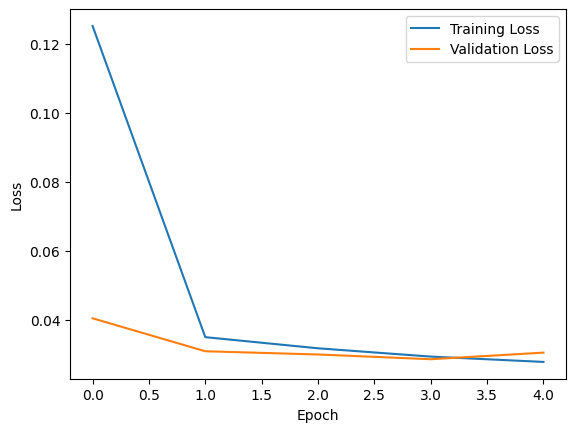

Model saved.


In [ ]:
import gc
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, ToPILImage
import matplotlib.pyplot as plt

# Step 1: Organize data and directories
original_dir = '/content/dataset/720p/'  # Directory containing original 1080p images
scaled_dir = '/content/dataset/360s/'  # Directory containing scaled images

# Step 2: Load and preprocess the images
original_images = []
scaled_images = []

for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust file extensions if needed
        original_path = os.path.join(original_dir, filename)
        scaled_path = os.path.join(scaled_dir, filename)

        original_image = cv2.imread(original_path)
        scaled_image = cv2.imread(scaled_path)

        # Preprocess the images (resize and normalize)
        original_image = cv2.resize(original_image, (640, 360))
        scaled_image = cv2.resize(scaled_image, (640, 360))

        original_images.append(original_image)
        scaled_images.append(scaled_image)

original_images = np.array(original_images)
scaled_images = np.array(scaled_images)

original_images = original_images.transpose((0, 3, 1, 2))  # Transpose from (num_samples, 640, 360, 3) to (num_samples, 3, 640, 360)
scaled_images = scaled_images.transpose((0, 3, 1, 2))  # Transpose from (num_samples, 640, 360, 3) to (num_samples, 3, 640, 360)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert the input data to the correct shape and move to GPU
original_images = torch.from_numpy(original_images).to(device).float()
scaled_images = torch.from_numpy(scaled_images).to(device).float()

# Define the U-Net model architecture

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Encoder
        self.encoder1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.encoder2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.encoder3 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.encoder4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        # Decoder
        self.decoder5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        )
        self.decoder6 = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        )
        self.decoder7 = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        )
        self.decoder8 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=1)
        )

    def forward(self, x):
        # Encoder
        x1 = self.encoder1(x)
        x2 = self.encoder2(x1)
        x3 = self.encoder3(x2)
        x4 = self.encoder4(x3)

        # Decoder
        d5 = self.decoder5(x4)
        d4 = self.decoder6(torch.cat([d5, x3], dim=1))
        d3 = self.decoder7(torch.cat([d4, x2], dim=1))
        d2 = self.decoder8(torch.cat([d3, x1], dim=1))

        return d2

# Step 2: Load the previous model checkpoint
#checkpoint_path = '/content/checkpoints/model_epoch_6.pth'  # Path to the previous model checkpoint file

# Create an instance of the U-Net model
model = UNet()

# Load the model checkpoint
# checkpoint = torch.load(checkpoint_path)
# model.load_state_dict(checkpoint['model_state_dict'])

# Move the model to GPU if available
model.to(device)

# Print the model architecture
#print(model)

# Step 5: Compile and train the model
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=2, verbose=True)
# Create lists to store training and validation losses
train_losses = []
val_losses = []

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, inputs, targets, transform=None):
        self.inputs = inputs
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_image = self.inputs[idx]
        target_image = self.targets[idx]

        # Convert tensors to PIL images
        input_image = ToPILImage()(input_image)
        target_image = ToPILImage()(target_image)

        if self.transform:
            input_image = self.transform(input_image)
            target_image = self.transform(target_image)

        return input_image, target_image


# Create dataloaders for training and validation
train_dataset = CustomDataset(scaled_images, original_images, transform=ToTensor())
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)

val_dataset = CustomDataset(scaled_images, original_images, transform=ToTensor())  # Replace with your validation dataset
val_dataloader = DataLoader(val_dataset, batch_size=10, shuffle=False)

# Training loop
for epoch in range(7):
    running_loss = 0.0
    for inputs, targets in train_dataloader:
        inputs = inputs.to(device).float()  # Convert input data to float
        targets = targets.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch: {epoch+1}, Loss: {running_loss}")

    # Calculate training loss
    train_loss = running_loss / len(train_dataloader)
    train_losses.append(train_loss)

    # Calculate validation loss
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for val_inputs, val_targets in val_dataloader:
            val_inputs = val_inputs.to(device).float()
            val_targets = val_targets.to(device)

            val_outputs = model(val_inputs)
            loss = criterion(val_outputs, val_targets)

            val_loss += loss.item()

        val_loss /= len(val_dataloader)
        val_losses.append(val_loss)

    # Adjust learning rate based on the validation loss
    scheduler.step(val_loss)

    # Check for overfitting
    if epoch > 0:
        if val_losses[epoch] > val_losses[epoch-1]:
            print("Model is starting to overfit. Stopping training.")
            break

    # Save checkpoint after every epoch
    checkpoint_path = f'/content/checkpoints/model_epoch_{epoch+1}.pth'
    torch.save({
        'epoch': epoch+1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': running_loss
    }, checkpoint_path)
    print(f"Checkpoint saved at: {checkpoint_path}")

# Plot training and validation losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Save the trained model
torch.save(model.state_dict(), '/content/model.pth')
print("Model saved.")


# Perform memory cleanup
gc.collect()
# Clear GPU memory
torch.cuda.empty_cache()


In [ ]:
import numpy as np
import cv2
import torch
import torch.nn as nn
from PIL import Image

# Load the trained model
model = UNet()
model.load_state_dict(torch.load('/content/model.pth'))

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Load and preprocess the input image
input_image = cv2.imread('/content/dataset/360s/045.jpg')
input_image = cv2.resize(input_image, (640, 360))
input_tensor = ToTensor()(input_image).unsqueeze(0).to(device)

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    # Forward pass
    output_tensor = model(input_tensor)

# Convert the output tensor to a numpy array
output_image = output_tensor.squeeze(0).cpu().numpy()

# Convert the output tensor to a numpy array
output_image = output_tensor.squeeze(0).cpu().numpy()

# Transpose the output array to match the shape (height, width, channels)
output_image = np.transpose(output_image, (1, 2, 0))

# Scale the pixel values from [0, 1] to [0, 255]
output_image = (output_image * 255).astype(np.uint8)

# Convert the output array to a PIL image
output_image = Image.fromarray(output_image)

# Save the predicted image
output_image.save('/content/predicted/predicted_image.jpg')

In [ ]:
import numpy as np
from PIL import Image

# Load the original and predicted images
original_image = Image.open('/content/dataset/720p/045.jpg')
predicted_image = Image.open('/content/predicted/predicted_image.jpg')

# Convert images to numpy arrays
original_array = np.array(original_image)
predicted_array = np.array(predicted_image)

# Calculate the pixel-wise difference
diff_array = np.abs(original_array - predicted_array)

# Calculate the number of mismatched pixels
num_mismatched_pixels = np.sum(diff_array > 0)

# Calculate the total number of pixels
total_pixels = original_array.size

# Calculate the accuracy as the percentage of matching pixels
accuracy = ((total_pixels - num_mismatched_pixels) / total_pixels) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 3.07%


In [ ]:
!rm -rf temp_scaled
!mkdir temp_scaled
!cp /content/checkpoints/model_epoch_6.pth /content/temp_model/model_epoch_6.pth